In [2]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('output.csv')
df.head()

,Number of Rooms,Areas,Levels,Prices,Districts,Years,Ceilings,Owners,Bathrooms,Repairs
0,2,56.7,3,38000000,Жетысуский,2006,2.70,Хозяин недвижимости,санузел раздельный,0
1,3,100.0,13,59000000,Бостандыкский,2019,2.85,Специалист,санузел совмещенный,0
2,1,45.8,3,59600000,Бостандыкский,2022,3.00,Специалист,санузел совмещенный,1
3,2,67.0,4,28400000,Алатауский,2012,2.80,Специалист,санузел раздельный,1
4,3,93.0,2,55000000,Алатауский,2018,3.00,Хозяин недвижимости,санузел 2 с/у и более,1


In [3]:
df = df.drop_duplicates()
df.shape

(14323, 10)

In [4]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
def normalize_nums(column_name):
    column = df[column_name]
    
    # Reshape the prices to a 2D array
    column_2d = column.values.reshape(-1, 1)
    column_normalized = scaler.fit_transform(column_2d)
    df[column_name] = column_normalized


In [5]:
normalize_nums('Prices')
normalize_nums('Areas')
normalize_nums('Years')
normalize_nums('Number of Rooms')
normalize_nums('Ceilings')
normalize_nums('Levels')
df.head()

,Number of Rooms,Areas,Levels,Prices,Districts,Years,Ceilings,Owners,Bathrooms,Repairs
0,0.090909,0.057391,0.066667,0.019097,Жетысуский,0.800000,0.01750,Хозяин недвижимости,санузел раздельный,0
1,0.181818,0.108840,0.400000,0.030394,Бостандыкский,0.936842,0.02125,Специалист,санузел совмещенный,0
2,0.000000,0.044439,0.066667,0.030717,Бостандыкский,0.968421,0.02500,Специалист,санузел совмещенный,1
3,0.090909,0.069629,0.100000,0.013933,Алатауский,0.863158,0.02000,Специалист,санузел раздельный,1
4,0.181818,0.100523,0.033333,0.028243,Алатауский,0.926316,0.02500,Хозяин недвижимости,санузел 2 с/у и более,1


In [6]:
def target_encode(df, categorical_column, target_column, smoothing=1):
    
    # Calculate the mean of the target variable for each category
    means = df.groupby(categorical_column)[target_column].mean()

    # Calculate the number of occurrences of each category
    counts = df.groupby(categorical_column)[target_column].count()

    # Apply smoothing to avoid overfitting
    smoothed_means = (counts * means + smoothing * df[target_column].mean()) / (counts + smoothing)

    # Map the target-encoded values to the original categorical column
    df_copy = df.copy()
    df_copy[categorical_column] = df_copy[categorical_column].map(smoothed_means)

    return df_copy

In [7]:
df = target_encode(df, 'Districts', 'Prices')
df = target_encode(df, 'Owners', 'Prices')
df = target_encode(df, 'Bathrooms', 'Prices')
df.head()

,Number of Rooms,Areas,Levels,Prices,Districts,Years,Ceilings,Owners,Bathrooms,Repairs
0,0.090909,0.057391,0.066667,0.019097,0.014538,0.800000,0.01750,0.024085,0.022398,0
1,0.181818,0.108840,0.400000,0.030394,0.037407,0.936842,0.02125,0.030853,0.021424,0
2,0.000000,0.044439,0.066667,0.030717,0.037407,0.968421,0.02500,0.030853,0.021424,1
3,0.090909,0.069629,0.100000,0.013933,0.014153,0.863158,0.02000,0.030853,0.022398,1
4,0.181818,0.100523,0.033333,0.028243,0.014153,0.926316,0.02500,0.024085,0.059624,1


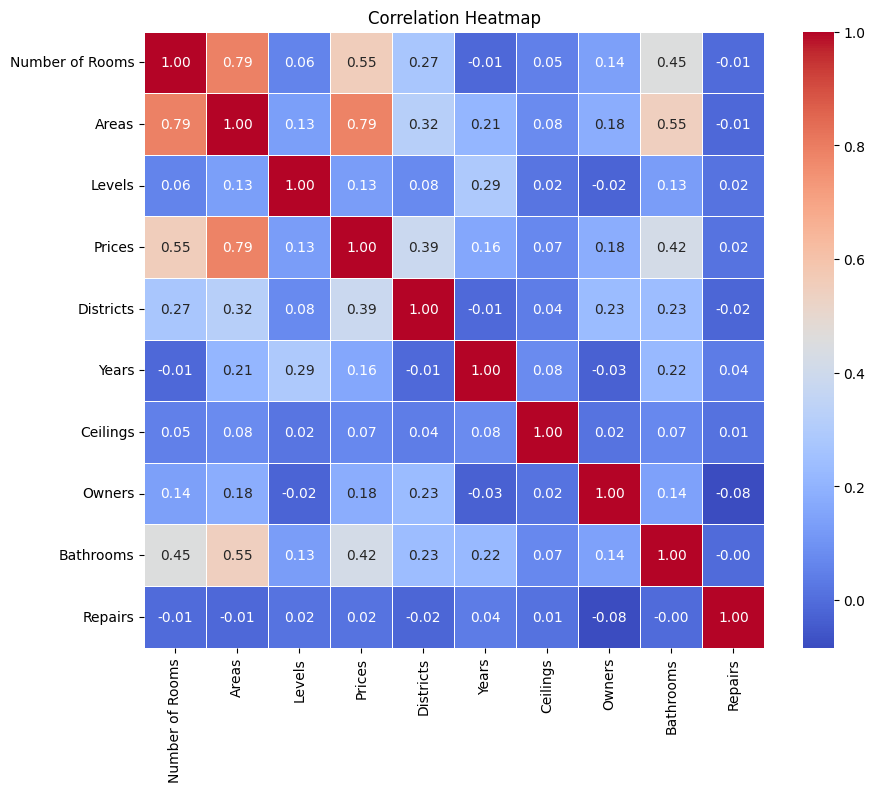

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# # Calculate the correlation matrix
correlation_matrix =df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your DataFrame is named 'df'
# X contains the features, and y is the target variable 'Prices'
X = df.drop('Prices', axis=1)
y = df['Prices']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_linear = linear_reg_model.predict(X_test)

# Calculate MSI (Mean Squared Error) and R-squared for Linear Regression
msi_linear = mean_squared_error(y_test, y_pred_linear)
r_squared_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression - MSI:", msi_linear)
print("Linear Regression - R-squared:", r_squared_linear)

# 2. Decision Tree Regressor
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_tree = decision_tree_model.predict(X_test)

# Calculate MSI and R-squared for Decision Tree Regressor
msi_tree = mean_squared_error(y_test, y_pred_tree)
r_squared_tree = r2_score(y_test, y_pred_tree)

print("Decision Tree Regressor - MSI:", msi_tree)
print("Decision Tree Regressor - R-squared:", r_squared_tree)

# 3. Random Forest Regressor
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_forest = random_forest_model.predict(X_test)

# Calculate MSI and R-squared for Random Forest Regressor
msi_forest = mean_squared_error(y_test, y_pred_forest)
r_squared_forest = r2_score(y_test, y_pred_forest)

print("Random Forest Regressor - MSI:", msi_forest)
print("Random Forest Regressor - R-squared:", r_squared_forest)



Linear Regression - MSI: 0.000210414962333371
Linear Regression - R-squared: 0.7393464922254396
Decision Tree Regressor - MSI: 0.00040372169525148676
Decision Tree Regressor - R-squared: 0.4998859640728943
Random Forest Regressor - MSI: 0.0002559183456775673
Random Forest Regressor - R-squared: 0.6829787493959925
